<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Satander_CustomerSatisfaction%20week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
df3=pd.read_csv('/content/Santander Customer Satisfaction_train.csv')
df3.shape

(76020, 371)

In [6]:
[col for col in df3.columns if df3[col].isnull().sum()>0]

[]

In [23]:
df3.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
X = df3.drop('TARGET',axis=1)
y = df3['TARGET']

In [8]:
X = pd.get_dummies(X,drop_first=True)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

38

In [11]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [12]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

108

In [13]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [14]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

10


In [15]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)

In [16]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

98


In [17]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

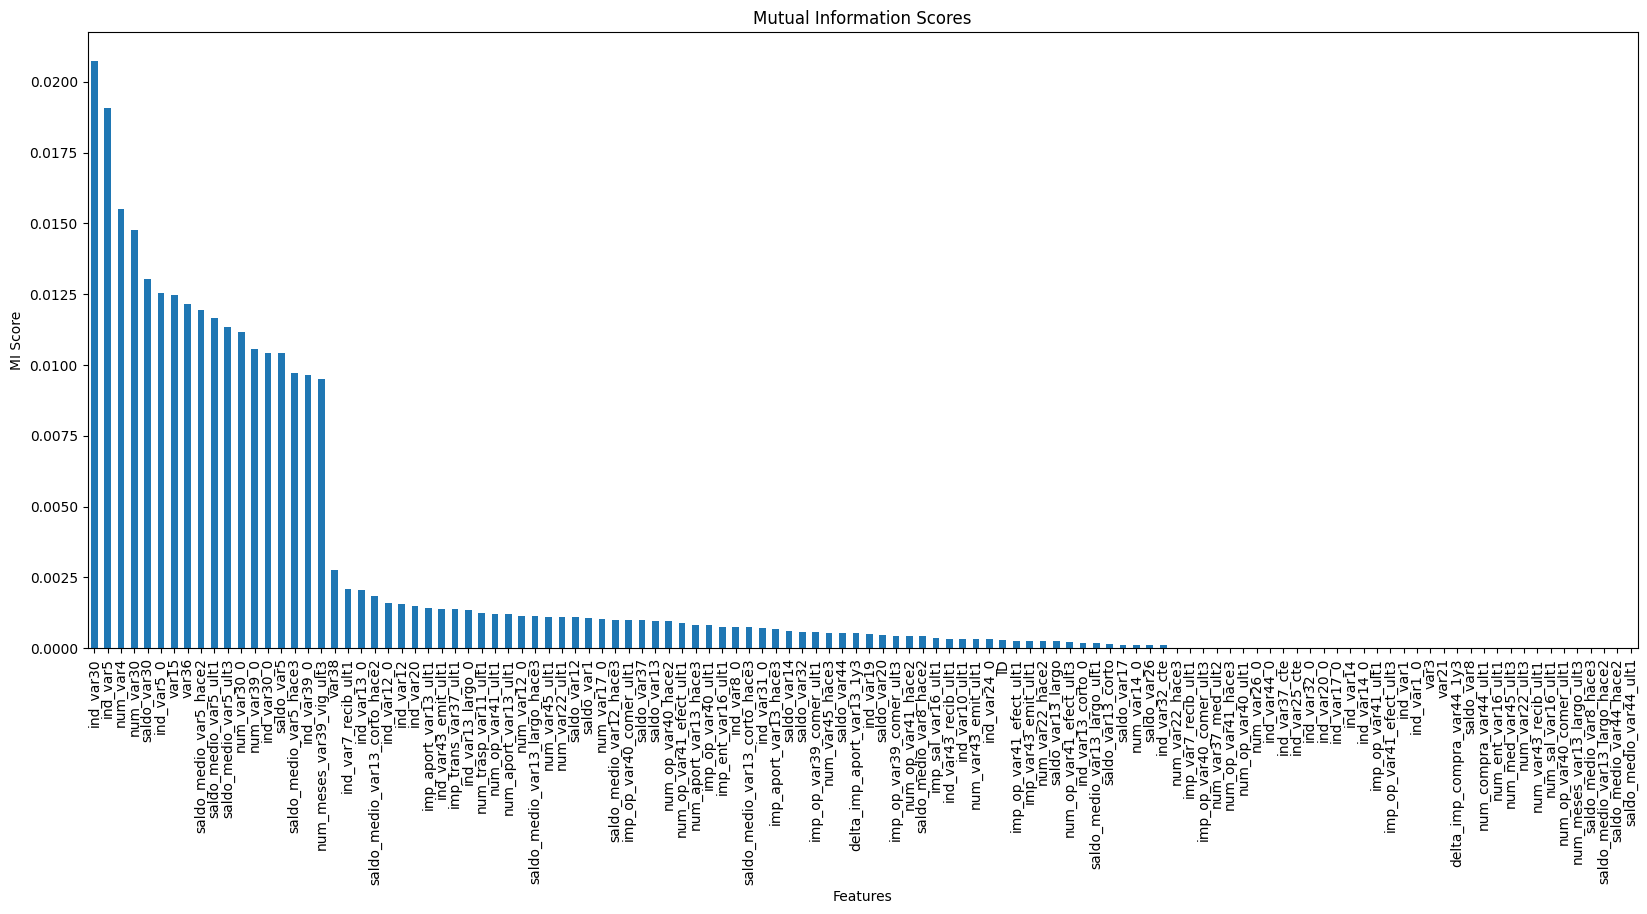

Top 10 Selected Features:
 ['var15', 'ind_var5_0', 'ind_var5', 'ind_var30', 'num_var4', 'num_var30', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3']


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

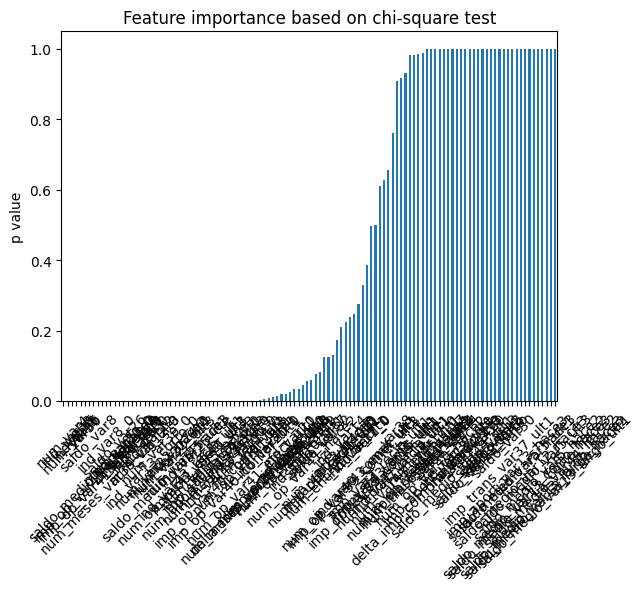

In [19]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

Text(0.5, 1.0, 'Anova')

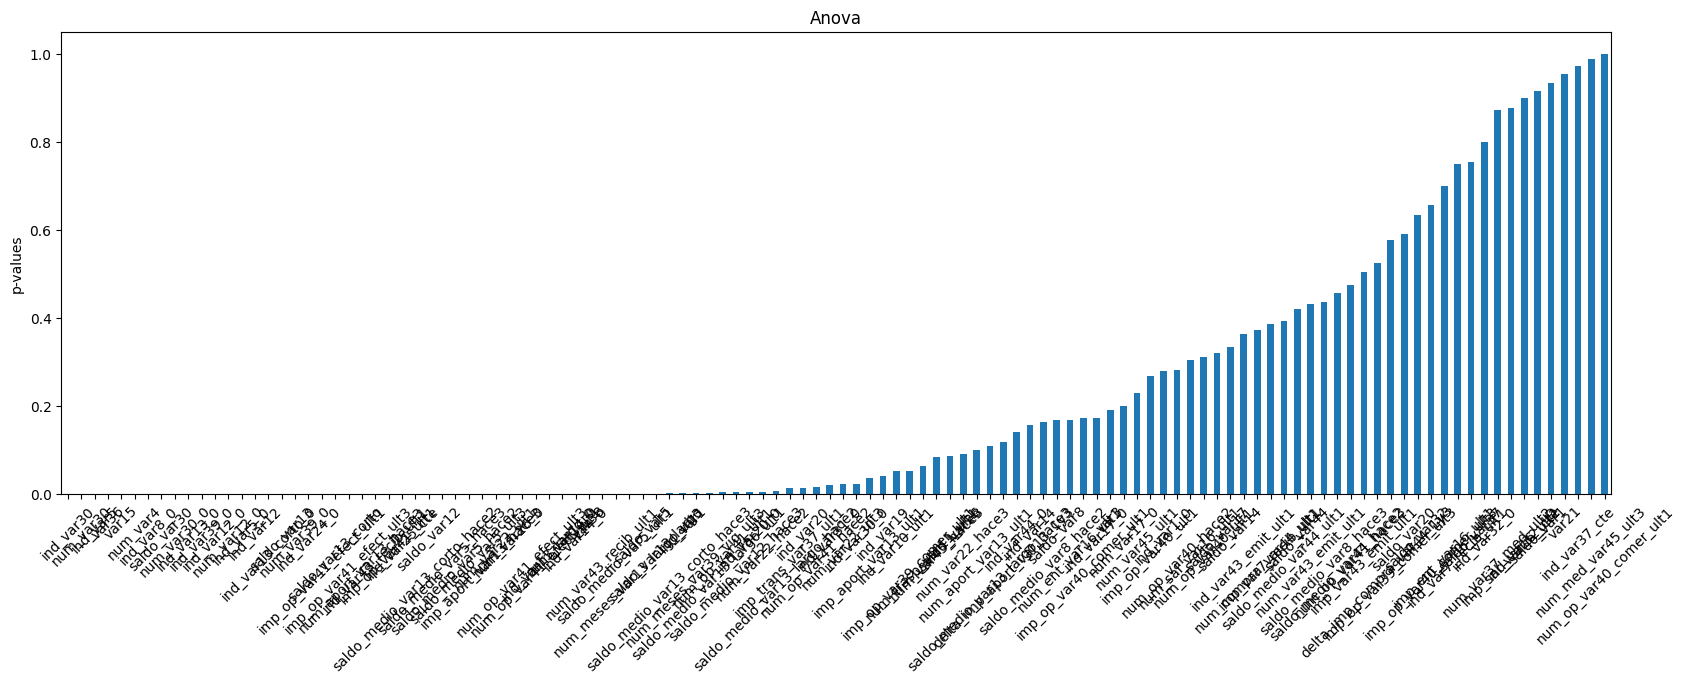

In [20]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")